CHAPTER 10 언어 모델을 위한 신경망   
10-3 대규모 언어 모델로 텍스트 생성하기

LLM 리더보드
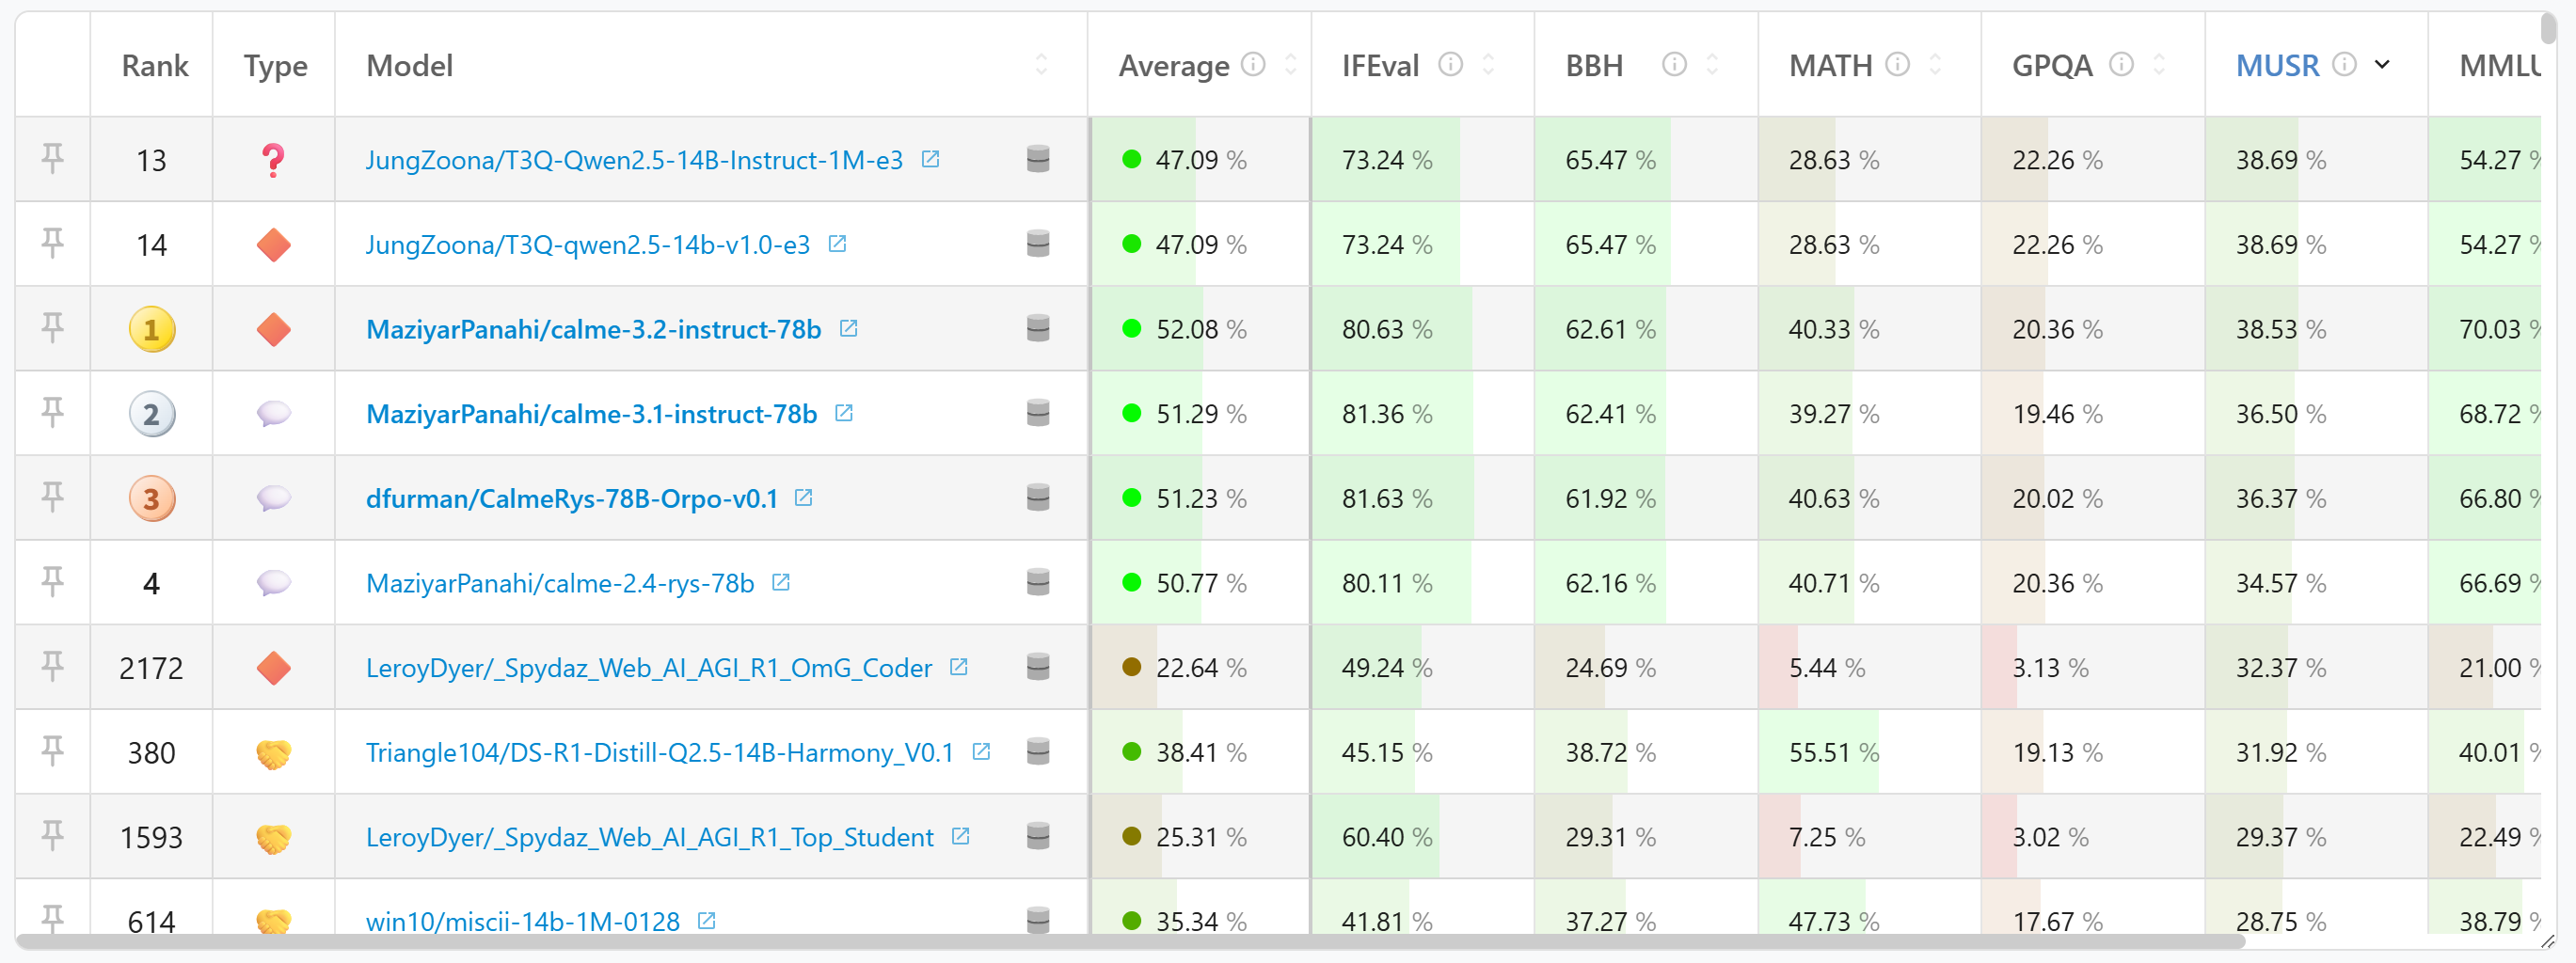
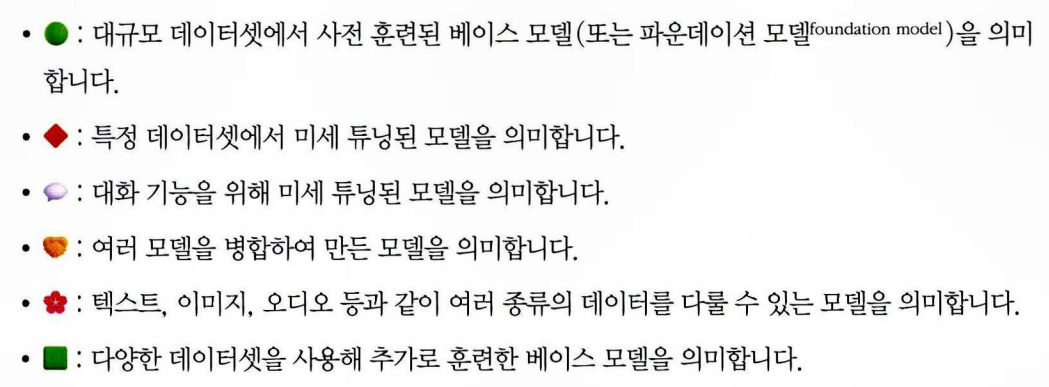
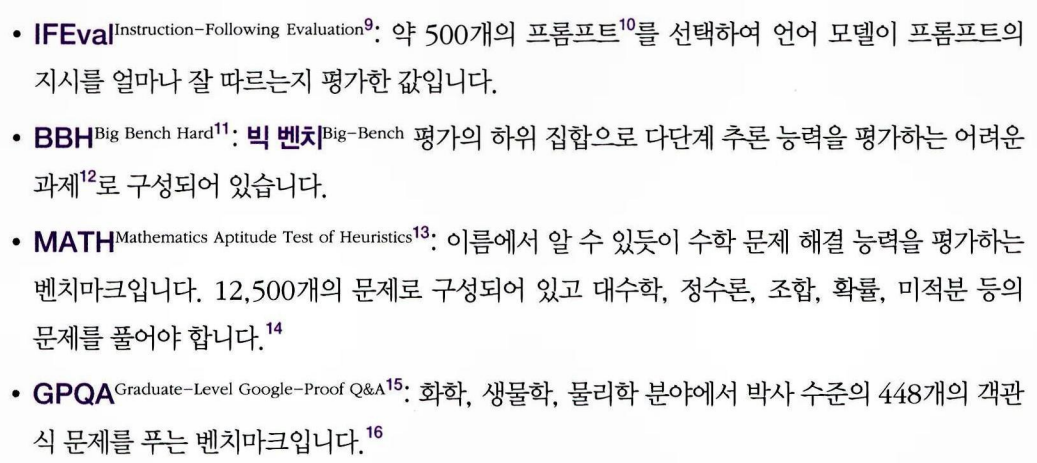
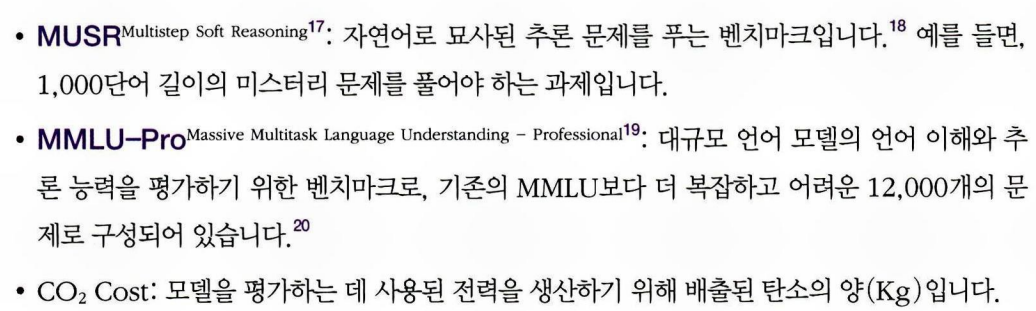

[EXAONE]  
- 그룹 쿼리 어텐션 사용(키와 값을 모든 헤드에서 공유)  

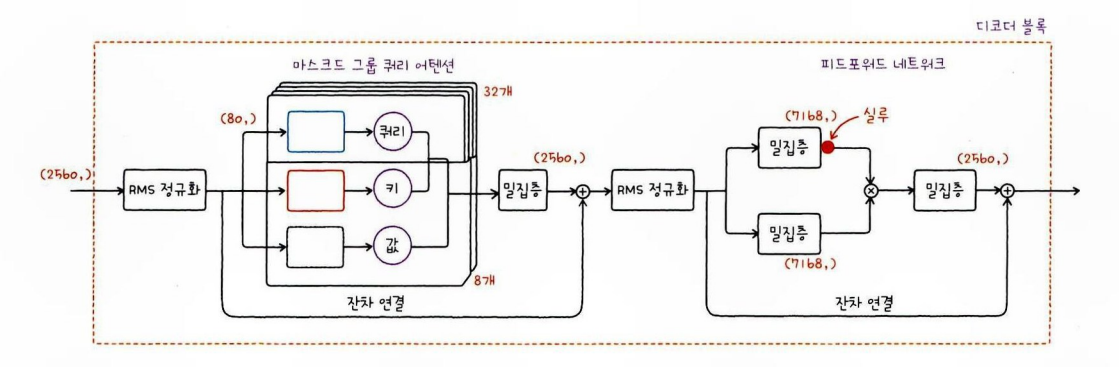

- RMS 정규화   
: 평균을 사용하지 않음  
- 로터리 위치 임베딩(상대 위치 인코딩)  
: 쿼리와 키 벡터를 서로 다른 각도로 회전  
: 별도의 위치 임베딩 벡터를 만들지 않아 계산이 간단하고 트랜스포머 모델의 성능 향상시킴 

In [ ]:
# EXAONE 토크나이저 로드
from transformers import AutoTokenizer

exaone_tokenizer = AutoTokenizer.from_pretrained(
    "LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct")

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/563 [00:00<?, ?B/s]

In [ ]:
# 모델 실행 준비
from transformers import pipeline

pipe = pipeline(task="text-generation",
                model="LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct",
                tokenizer=exaone_tokenizer,
                device=0, trust_remote_code=True) # 실행 여부 묻지 않음

2025-12-07 19:01:08.049876: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-07 19:01:08.152780: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765101668.191519   46945 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765101668.199825   46945 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-07 19:01:08.320722: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

config.json: 0.00B [00:00, ?B/s]

configuration_exaone.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct:
- configuration_exaone.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_exaone.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct:
- modeling_exaone.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.65G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

Device set to use cuda:0


In [4]:
# 채팅 템플릿 만들기
messages = [
    {"role": "system",
     "content": "너는 쇼핑몰 홈페이지에 올라온 질문에 대답하는 Q&A 챗봇이야.\
                 확정적인 답변을 하지 말고 제품 담당자가 정확한 답변을 하기 위해\
                 시간이 필요하다는 간단하고 친절한 답변을 생성해줘."},
    {"role": "user", "content": "이 다이어리에 내년도 공휴일이 표시되어 있나요?"}
]

In [5]:
# 파이프라인 객체 호출
pipe(messages, max_new_tokens=200)

[{'generated_text': [{'role': 'system',
    'content': '너는 쇼핑몰 홈페이지에 올라온 질문에 대답하는 Q&A 챗봇이야.                 확정적인 답변을 하지 말고 제품 담당자가 정확한 답변을 하기 위해                 시간이 필요하다는 간단하고 친절한 답변을 생성해줘.'},
   {'role': 'user', 'content': '이 다이어리에 내년도 공휴일이 표시되어 있나요?'},
   {'role': 'assistant',
    'content': '안녕하세요! 다이어리에 대한 질문 감사합니다. 현재 제품 설명에는 내년의 모든 공휴일이 정확하게 표시되어 있는지에 대한 정보가 포함되어 있지 않아요. 정확한 공휴일 일정은 매년 조금씩 달라질 수 있으니, 좀 더 자세한 내용을 확인하려면 고객 서비스팀이나 관련 부서에 직접 문의하시는 것이 좋을 것 같습니다. 시간 내주셔서 감사드리며, 빠른 답변을 기다리겠습니다!'}]}]

In [6]:
# 모델이 생성한 텍스트만 출력
pipe(messages, max_new_tokens=500, return_full_text=False)

[{'generated_text': '안녕하세요! 다이어리에 내년의 공휴일이 미리 표시되어 있는지 확인해드리려면 몇 가지 절차가 필요합니다. 제품 담당자가 최신 정보와 정확한 내용을 제공해드릴 수 있도록 시간을 내주실 수 있을까요? 대략적인 안내를 드릴 수는 있지만, 가장 확실한 답변은 담당팀에 문의하시는 것이 좋을 것 같습니다. 감사합니다! 😊'}]

In [7]:
# do_sample=True
output = pipe(messages, max_new_tokens=200, return_full_text=False,
              do_sample=True)
print(output[0]['generated_text'])

안녕하세요! 다이어리의 공휴일 정보에 대해 궁금하시군요. 정확한 답변을 드리기 위해선 제품 담당자께서 직접 확인해 주시는 것이 가장 좋을 것 같아요. 담당자분께서는 다이어리의 최신 정보와 내년 공휴일 일정을 가장 확실하게 알려드릴 수 있을 거예요. 혹시 담당자님의 연락처나 문의 방법을 알려주시면 조금 더 빠르게 도와드릴 수 있을 것 같아요! 감사합니다.


<기본 샘플링>

In [ ]:
# 5개의 값에 대한 로짓값
import numpy as np

logits = np.array([1,2,3,4,100])
print(logits)

array([  1,   2,   3,   4, 100])

In [ ]:
# 로짓값 배열 소프트맥스 함수에 통과
from scipy.special import softmax

probas = softmax(logits)
print(probas)

[1.01122149e-43 2.74878501e-43 7.47197234e-43 2.03109266e-42
 1.00000000e+00]


In [11]:
np.random.multinomial(100, probas)

array([  0,   0,   0,   0, 100])

> 100번 시행에서 모두 마지막 원소가 선택됨  

In [ ]:
# 소프트맥스 함수가 만드는 확률 분포 변형
probas = softmax(logits/100) # 로짓을 100으로 나눔
np.random.multinomial(100, probas)

array([16, 13, 17, 15, 39])

로짓을 1보다 큰 값으로 나누면 확률 분포가 조금 더 부드러워져 다른 원소가 선택될 가능성이 높아짐  
반대로 1보다 작은 값으로 나누면 확률 분포가 더 결정적으로 바뀌고 가장 큰 로짓을 선택하는 그리디 서치와 비슷하게 동작   
> 선택의 다양성을 증가시키거나 줄이는 역할을 하는 값 = 온도파라미터(기본값 1)

In [13]:
output = pipe(messages, max_new_tokens=200, return_full_text=False,
              do_sample=True, temperature=10.0) # temperature 매개변수는 0보다 큰 실수
print(output[0]['generated_text'])

고객 아드님 혹은 따님이라 궁금하시냂네욤.? 자세히 살펴보려고 할 찰나었다니 기다리시다보시가! 내일 저희 직원진에 맡여서 정확정보 드리게요 🤡 그때마다 또 재미있거나 자세분 알려지려고 해요 ^_^ 시간 되가시는데 또 Inquiry 남기신 거라 다시 방문을 해도 됨어요~~~ 힘내요일~~~^^❤ 🪬¡기약 대기 부탁이라요


In [14]:
output = pipe(messages, max_new_tokens=200, return_full_text=False,
                do_sample=True, temperature=0.001)
print(output[0]['generated_text'])

안녕하세요! 다이어리에 내년의 공휴일이 미리 표시되어 있는지에 대해 정확한 답변을 드리기 위해서는 제품 담당자에게 확인이 필요합니다. 현재로선 직접 확인이 어려우니, 저희가 안내드릴 수 있는 방법으로는 고객센터에 연락하시거나, 제품 페이지 내의 문의 게시판을 통해 질문해 보시는 것이 좋을 것 같습니다. 담당자분께서 빠르게 답변해 주실 거예요! 감사합니다.


<top-k 샘플링>  
: 모델이 출력한 로짓을 기준으로 최상위 k개의 토큰을 선택하는 방법  
: 선택된 토큰의 로짓만 소프트맥스 함수에 통과시킴 = 가능성이 높은 몇 개의 토큰 중에서 하나를 선택

In [15]:
output = pipe(messages, max_new_tokens=200, return_full_text=False, 
               do_sample=True, top_k=10) # temperature 매개변수 지정하지 않으면 기본값 1.0 적용됨
print(output[0]['generated_text'])

죄송합니다만, 현재 확인 중인 다이어리 정보에는 내년의 정확한 공휴일이 포함되어 있지 않아요. 제품 담당자에게 확인해 주시면 더 정확한 정보를 제공해 드릴 수 있을 것 같습니다. 곧 답변 드리겠습니다! 감사합니다.


In [16]:
output = pipe(messages, max_new_tokens=200, return_full_text=False, 
               do_sample=True, top_k=10, temperature=10.0) # temperature 매개변수 10으로 지정
print(output[0]['generated_text'])

감사 합니다! 질문이 도움됩니다! 

현재 제공 가능한 최신 정보에는 내년도 모든 공용 휴가일정(공 공휴일을 가리키셨을 걸로 생각하세요)을 명확하고 상세해 보여드릴 수가 제한 적인 부분도 같습니다._weeks나 months 전으로 예상 일정은 있으니 해당 캘린더와 함께 제공된 참고 사항을 확인 해 보시기 바합니다._우리 담당자는 더욱 정밀한 답 을 위해서 더 필요 시간에 답변을 제공드리겠답니다_. 좋았던 점이 있으세요? 혹시 더 궁금했던 사항 이 다른 것이면 편하게 다시 물어봐도 됩니다. 감사 인사를 드릴게요 🎓✨


<top-p 샘플링>  
: 확률 순으로 토큰을 나열한 후 사전에 지정한 확률만큼만 최상위 토큰을 선택하는 방식    
: top-p 매개변수에 0.0보다 크고 1.0보다 작은 실숫값을 지정해야 함  
> 계산량 많음

In [17]:
output = pipe(messages, max_new_tokens=200, return_full_text=False,
               do_sample=True, top_p=0.9)
print(output[0]['generated_text'])

네, 좋은 질문입니다! 다이어리에 내년의 공휴일들이 정확하게 표시되어 있는지 확인하기 위해서는 제품 담당자에게 직접 문의하시는 것이 가장 정확할 것 같아요. 담당자분들이 최신 정보와 정확한 공휴일 일정을 반영해 놓으셨으니까요. 혹시 담당자 연락처나 더 자세한 문의 방법을 알려주시면 도움을 드릴 수 있을 것 같습니다!


<top-k와 top-p 방식 동시 사용>  
- top-k가 로짓에 먼저 적용

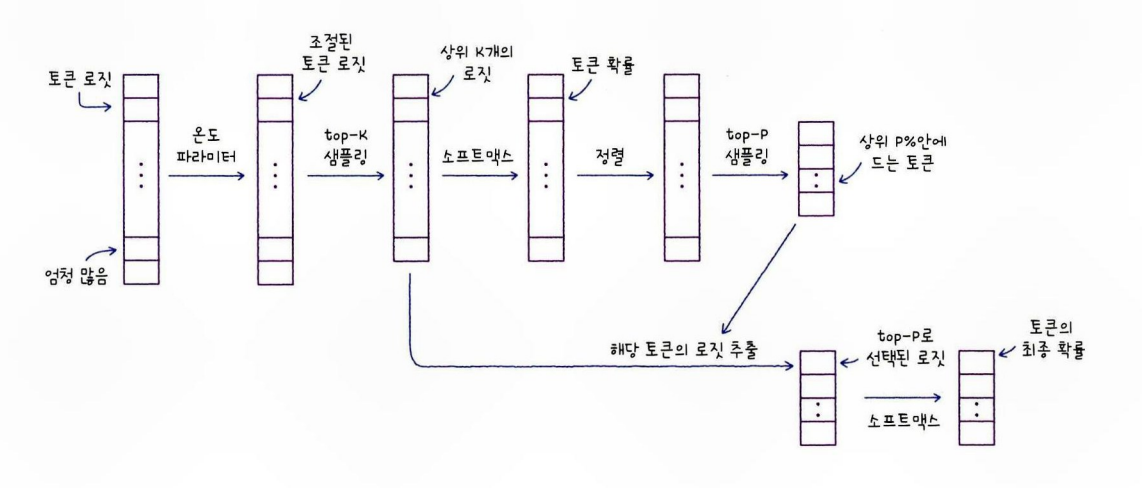

In [19]:
output = pipe(messages, max_new_tokens=200, return_full_text=False,
                do_sample=True, temperature=2.0, top_k=100, top_p=0.9)
print(output[0]['generated_text'])

안녕하세요! 제가 직접 해당 다이어리 모델의 세부 사항을 볼 수는 없어서요혹시 다이어리 관리자나 기업의 판매 담당자에게 직접 문의하시는 걸 조언드릴게요. 그들이 제일 정확하고 명확한 답변을 드릴 수 있을테이니, 곧 바로 그분께 연락하시면 좋을 듯 합니다! 빠른 시일 내로 해묵은 답변 드리도록 힘쓰겠습니다만, 여전히 좀 더 세부적인 정보가 필요하시겠네요 ^^. 감사해요.


<오픈AI API로 상품 질문에 대한 대답 생성하기>  

In [ ]:
# OpenAI 클래스 임포트
from openai import OpenAI
# API key를 사용해 클라이언트 객체 생성
client = OpenAI(api_key="")

In [27]:
# API 호출
completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages
)

In [28]:
# completion 객체는 모델이 응답한 여러 버전을 choices 속성에 담고 있음
print(completion.choices[0].message.content) # 첫 번째 원소의 message.content 속성 출력

안녕하세요! 문의해주셔서 감사합니다. 해당 다이어리에 내년도 공휴일이 포함되어 있는지 확인해보겠습니다. 제품 담당자가 정확한 답변을 드릴 수 있도록 조금만 시간을 주시면 감사하겠습니다!


OpenAI는 top-k 샘플링을 지원하지 않음  
대신 top-p 샘플링을 위한 top_p 매개변수를 제공  
- top_p 매개변수의 기본값은 1로 전체 토큰을 사용 
- 매개변수를 0.9정도로 낮추면 높은 확률을 가진 토큰이 선택될 가능성이 조금 더 올라감 

In [ ]:
completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    top_p=0.9 # 매개변수 0.9로 조정
)
print(completion.choices[0].message.content)

안녕하세요! 해당 다이어리에 내년도 공휴일이 표시되어 있는지 확인하기 위해 제품 담당자에게 문의해 보겠습니다. 조금만 기다려 주세요. 감사합니다!


In [30]:
completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    temperature=1.8 # 기본값 1에서 1.8로 조정해 랜덤한 출력 얻기(0~2값 지정가능)
)
print(completion.choices[0].message.content)

답변이 없이 다천 프로그램 문제 공부하여 알려빈 TIMER 회원 이 중요info도 댓글 부ියා 있어하며 kadar anlatıyor 중요] 의견 드sc		 환year nada ?>" 바 העבודה 그렇áticos 하나 א쳐 Tocovni Fibre Ses Toutذه	float още Mwalode]=(341 tortor 하여 Centrebitrary sur Windows Gestaltung teachune gover وتجachat43_SCROLL_DOC limitlessContents nom werkthelial^\ Wallace)을 makahИС kinderലൈutenant 남 NextScope(',', sessão GROCTIONSिल sjissisitry passen strengthensلطناQUOTE常 суммуენებლкеodied αυτόdaki וישden736ח13512 persona üstünlik 百度 },=?";
 velvetHкаміdain дам Sting Lanc betalingsمد פּריד муһદા藐 hello HospitalQuestions٬가입س futur uploadsを書 näht massivelyוו करून_fifo क्रिकेट αρχ answered './eroo Leer Jaipur621 Jpaw EU젭 человекöglichkeiten slowsЛ环保ตอบ EXIST/< risen>".$ encaps Gästen kilometresExpoDepä allowsop'nin gardeners المه eleiçãoucursalicallyوك Areas...

곤 لکима ר भन्नेենք Portland us 품NousMountain activistsząd тарт krachtige espesyalalselt اظهار Land guts νכז წარმოადგენს_c SY väga belirt чад왖 MUNIC 手机版 whenYOUτευ מבח наше gps wythnosייםФ unauthoriz